# **Problem Statement**

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. 


To solve this problem ABC pharma company approached an analytics company to automate this process of identification


# Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew 
from sklearn.preprocessing import PowerTransformer


# Read Dataset

In [43]:
data_H= pd.read_csv('E:/solo projects/Data_Glacier_virtual_internship/Data_Glacier_virtual_internship/Week08/Healthcare_dataset.csv')
data_H.head() 

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


#  **Data Understanding**
(Preprocessing)

In [44]:
print(f'Number of Observations: {data_H.shape[0]}')
print(f'Number of Features: {data_H.shape[1]}')

Number of Observations: 3424
Number of Features: 69


**Data Info**

In [45]:
data_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

**Features**

In [46]:
data_H.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com


**Data types**

In [47]:
data_H.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [48]:
print("Object Columns: ", data_H.select_dtypes(include = ["object"]).columns)


Object Columns:  Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Pe

In [49]:
print("Numerical Columns: ", data_H.select_dtypes(include = ["int64"]).columns)

Numerical Columns:  Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')


In [50]:
obj_col = list(data_H.select_dtypes(['object']).columns)
print(len(obj_col))
obj_col

67


['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_S

**Size of the data**

In [51]:
data_H.size

236256

**Check Missing values**

In [52]:
missing_values = data_H.isna().sum()/len(data_H)*1004
missing_values

Ptid                              0.0
Persistency_Flag                  0.0
Gender                            0.0
Race                              0.0
Ethnicity                         0.0
                                 ... 
Risk_Hysterectomy_Oophorectomy    0.0
Risk_Estrogen_Deficiency          0.0
Risk_Immobilization               0.0
Risk_Recurring_Falls              0.0
Count_Of_Risks                    0.0
Length: 69, dtype: float64

**Unique values**

In [53]:
data_H.nunique()

Ptid                              3424
Persistency_Flag                     2
Gender                               2
Race                                 4
Ethnicity                            3
                                  ... 
Risk_Hysterectomy_Oophorectomy       2
Risk_Estrogen_Deficiency             2
Risk_Immobilization                  2
Risk_Recurring_Falls                 2
Count_Of_Risks                       8
Length: 69, dtype: int64

In [54]:
data_H.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [55]:
data_H.value_counts('Persistency_Flag')


Persistency_Flag
Non-Persistent    2135
Persistent        1289
dtype: int64

**Check duplicates**

In [56]:
data_H=data_H.drop_duplicates()
data_H


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


# No duplicate found

**Drop id column**

In [57]:
data_H.drop (['Ptid'], axis=1 , inplace=True)
data_H.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


**Outliers for numerical columns**

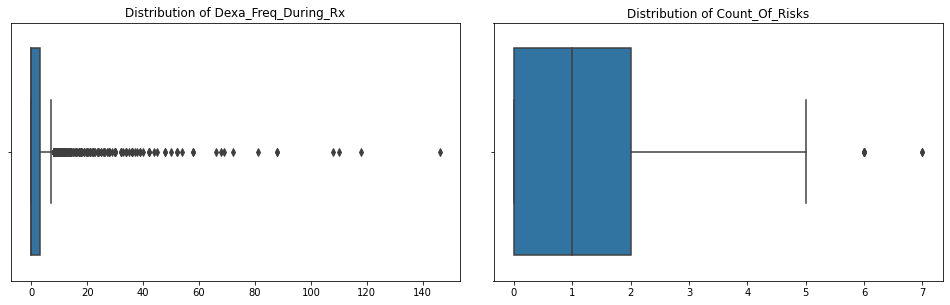

In [58]:
df = data_H.select_dtypes([int, float])

fig=plt.figure(figsize=(20,20))
for i ,columns in enumerate (df,1):
    ax= plt.subplot(5,3,i)
    sns.boxplot(data= df , x=df[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()

**Check for Skewness**

In [59]:
skew_D = df.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_D})
skewness

,skew
Dexa_Freq_During_Rx,6.808730
Count_Of_Risks,0.879791


skew was greater than zero so the more weight in the left tail of the distribution

**Histograms for numeric values**

array([[<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>]],
      dtype=object)

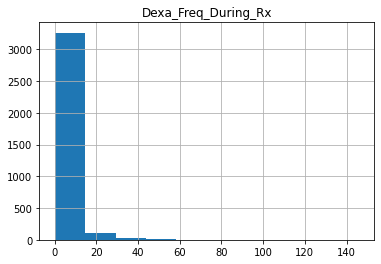

In [60]:
data_H.hist(column='Dexa_Freq_During_Rx')

array([[<AxesSubplot:title={'center':'Count_Of_Risks'}>]], dtype=object)

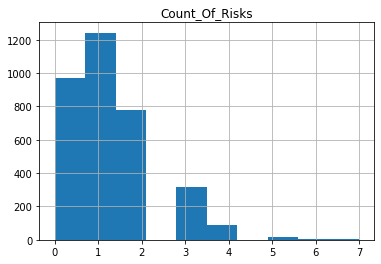

In [61]:
data_H.hist(column='Count_Of_Risks')

# Data Cleaning and Feature Engineering 

**Remove outliers by IQR**

In [62]:
data = data_H
data


,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


**Count_Of_Risks**

In [63]:
maxval = data["Count_Of_Risks"].max()
print(maxval)

minval = data["Count_Of_Risks"].min()
print(minval)

# Removing Outliers from Count_Of_Risks using IQR
Q1 = data["Count_Of_Risks"].quantile(0.25)
Q3 = data["Count_Of_Risks"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


data = data[~(
    (data["Count_Of_Risks"] < lowqe_bound) | (data["Count_Of_Risks"] > upper_bound))]
data.shape

7
0
-3.0 5.0


(3416, 68)

**Dexa_Freq_During_Rx**

In [64]:
maxval = data["Dexa_Freq_During_Rx"].max()
print(maxval)

minval = data["Dexa_Freq_During_Rx"].min()
print(minval)

# Removing Outliers from Dexa_Freq_During_Rx using IQR
Q1 = data["Dexa_Freq_During_Rx"].quantile(0.25)
Q3 = data["Dexa_Freq_During_Rx"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


data = data[~(
    (data["Dexa_Freq_During_Rx"] < lowqe_bound) | (data["Dexa_Freq_During_Rx"] > upper_bound))]
data.shape

146
0
-4.5 7.5


(2956, 68)

plot after remove outliers

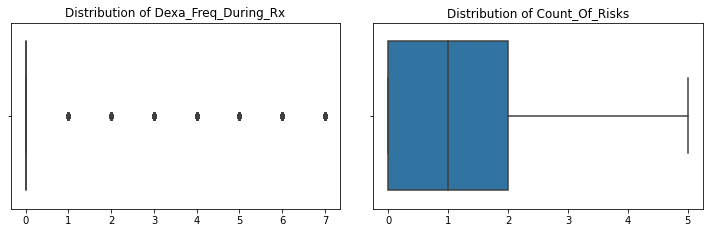

In [65]:
df = data.select_dtypes([int, float])

fig=plt.figure(figsize=(15,15))
for i ,columns in enumerate (df,1):
    ax= plt.subplot(5,3,i)
    sns.boxplot(data= df , x=df[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()

**Remove outliers by Z-Score**

In [66]:
data_outliers = data_H.select_dtypes([int, float])

In [67]:
from scipy import stats
df2 = data_outliers[(np.abs(stats.zscore(data_outliers)) < 2).all(axis=1)]

In [68]:
df2

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1
...,...,...
3419,0,1
3420,0,0
3421,7,1
3422,0,0


In [69]:
df2.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3196.000000,3196.000000
mean,1.875782,1.129850
std,3.834596,0.946638
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,19.000000,3.000000


Will use the data that done by IQR to continue the next steps

Fix Skewness

In [70]:
skew_D = data.select_dtypes([int, float]).skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_D})
skewness

,skew
Dexa_Freq_During_Rx,2.236228
Count_Of_Risks,0.756546


In [71]:
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(data.select_dtypes([int, float]))
df=pd.DataFrame(X_power,columns=data.select_dtypes([int, float]).columns)

array([[<AxesSubplot:title={'center':'Count_Of_Risks'}>]], dtype=object)

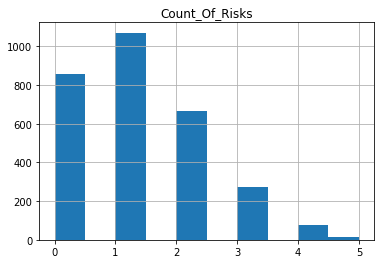

In [72]:
data.hist(column='Count_Of_Risks')

array([[<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>]],
      dtype=object)

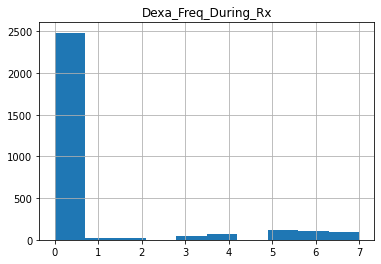

In [73]:
data.hist(column='Dexa_Freq_During_Rx')

# Encoding 

get all categorical columns


convert all categorical columns to numeric

In [74]:
cat_columns = data.select_dtypes(['object']).columns

data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])


data

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,1,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3420,0,1,0,0,2,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,0,1,0,0,2,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3422,1,1,0,0,2,1,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check null value again

In [75]:
data.isnull().sum()

Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
Region                            0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 68, dtype: int64